# 1. plot only compute path

In [12]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


# assign abs. path value 

car_path = r"D:\Z_DesayWorkSpace\7957_apa_onsite\7957_20220415\all\bvs_3_m5/"

# for parkingMiddleGoalsDemo
# log_car_file = car_path+"parkingMiddleGoalsDemo.log"
# path_car_file = car_path+"parkingMiddleGoalsDemo_reg.txt"

# for parkingMiddleGoals_original
# log_car_file = car_path+"parkingMiddleGoals_original.log"
# path_car_file = car_path+"parkingMiddleGoals_original_reg.txt"


# for ros_parkingMiddleGoalsDemo
log_car_file = car_path+"pc_log.log"
# log_car_file = car_path+"ros_log.txt"
path_car_file = car_path+"computed_path.txt"

print(log_car_file)
print(path_car_file)

D:\Z_DesayWorkSpace\7957_apa_onsite\7957_20220415\all\bvs_3_m5/pc_log.log
D:\Z_DesayWorkSpace\7957_apa_onsite\7957_20220415\all\bvs_3_m5/computed_path.txt


In [13]:
# parse log file:

pose_start_x = []
pose_start_y = []
pose_start_theta = []

pose_goal_x = []
pose_goal_y = []
pose_goal_theta = []

m_lane_width = 0.0
m_iterations = 0.0

forward_mid_x = []
forward_mid_y = []
forward_mid_theta = []

reverse_mid_x = []
reverse_mid_y = []
reverse_mid_theta = []


slot_center_x = []
slot_center_y = []
slot_center_theta = []


slot_center_apa_x = []
slot_center_apa_y = []
slot_center_apa_theta = []


try:

    with (open(log_car_file,"r")) as f:
        print("in log file\n")
        
        
        computePath_start = True
        computePath_goal = True
        
        
        for line in f:
           
            ##########################################################################################
            ########## for shared parking ParkingMiddleGoals
            
            # 1. get goal pose
            if ("ParkingMiddleGoals: received goal from sharedstate" in line):
                print("1. ParkingMiddleGoals: received goal from sharedstate -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[8]
                raw_y = line.split()[9]
                raw_theta = line.split()[10]
                pose_goal_x.append(float(raw_x))
                pose_goal_y.append(float(raw_y))
                pose_goal_theta.append(float(raw_theta))

                
            # 3. get m_iterations
            elif ("iteration loop level 1: m_iterations" in line):
#                 print("3. ParkingMiddleGoals: m_flow_util->m_iterations -- ok")
                raw = line.split()
#                 print(raw)
                raw_single_value = line.split()[8]
                m_iterations = raw_single_value                
  
            
            # 4. get m_lane_width
            elif ("ParkingMiddleGoals: m_lane_width" in line):
                print("4. ParkingMiddleGoals: m_lane_widths -- ok")
                raw = line.split()
                print(raw)
                raw_single_value = line.split()[5]
                m_lane_width = raw_single_value

                
            # 10. estimated parking spot center (parking_center = true_goal + offest * angle)
            elif ("ParkingMiddleGoals: convert goal to estimated parking spot center" in line):
                print ("10. ParkingMiddleGoals: convert goal to estimated parking spot center -- ok")
                print(line.split())
                raw_x = line.split()[11]
                raw_y = line.split()[12]
                raw_theta = line.split()[13]
                slot_center_x.append(float(raw_x))
                slot_center_y.append(float(raw_y))
                slot_center_theta.append(float(raw_theta))
            
            
            # 11. parking spot center from APA
            elif ("ParkingMiddleGoals: parking spot center from APA" in line):
                print ("11. ParkingMiddleGoals: parking spot center from APA -- ok")
                print(line.split())
                raw_x = line.split()[11]
                raw_y = line.split()[12]
                raw_theta = line.split()[13]
                slot_center_apa_x.append(float(raw_x))
                slot_center_apa_y.append(float(raw_y))
                slot_center_apa_theta.append(float(raw_theta))                
            
            ##########################################################################################
            ########### for perpendicular parking                
                
            # 2. get start pose
            elif ("getPerpendicularPath: car_pose" in line):
                print("2. getPerpendicularPath: car_pose -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[5]
                raw_y = line.split()[6]
                raw_theta = line.split()[7]
                pose_start_x.append(float(raw_x))
                pose_start_y.append(float(raw_y))
                pose_start_theta.append(float(raw_theta))
            
                
            # 5. forward mid point
            elif ("getPerpendicularPath: forward mid point" in line):
                print("5. getPerpendicularPath: forward mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                forward_mid_x.append(float(raw_x))
                forward_mid_y.append(float(raw_y))
                forward_mid_theta.append(float(raw_theta))

            
            # 6. reverse mid point
            elif ("getPerpendicularPath: reverse mid point" in line):
                print("6. getPerpendicularPath: forward mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                reverse_mid_x.append(float(raw_x))
                reverse_mid_y.append(float(raw_y))
                reverse_mid_theta.append(float(raw_theta))

            
            
            ##########################################################################################
            ########### for parallel parking
            
            # 7. get start pose
            elif ("getParallelPath: car_pose" in line):
                print("7. getParallelPath: car_pose -- ok")
#                 raw = line.split()
#                 print(raw)
                raw_x = line.split()[5]
                raw_y = line.split()[6]
                raw_theta = line.split()[7]
                pose_start_x.append(float(raw_x))
                pose_start_y.append(float(raw_y))
                pose_start_theta.append(float(raw_theta))
                
            # 8. forward mid point
            elif ("getParallelPath: forward mid point" in line):
                print("8. getParallelPath: forward mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                forward_mid_x.append(float(raw_x))
                forward_mid_y.append(float(raw_y))
                forward_mid_theta.append(float(raw_theta))
                
            # 9. reverse mid point
            elif ("getParallelPath: reverse mid point" in line):
                print("9. getParallelPath: reverse mid point -- ok")
                raw = line.split()
#                 print(raw)
                raw_x = line.split()[7]
                raw_y = line.split()[8]
                raw_theta = line.split()[9]
                reverse_mid_x.append(float(raw_x))
                reverse_mid_y.append(float(raw_y))
                reverse_mid_theta.append(float(raw_theta))


            ##########################################################################################
            ########## for shared parking ComputePath
            
            # 10. ComputePath start pose
            elif ("Start pose: x:" in line):
                if computePath_start:
                    computePath_start = False
                    print("10. Start pose: x: -- ok")
                    print(line.split())
                    raw_x = line.split()[6].split(",")[0]
                    print(raw_x)
                    raw_y = line.split()[8].split(",")[0]
                    print(raw_y)
                    raw_theta = line.split()[10].split(",")[0]
                    print(raw_theta)
                    pose_start_x.append(float(raw_x))
                    pose_start_y.append(float(raw_y))
                    pose_start_theta.append(float(raw_theta))


            # 11. ComputePath goal pose
            elif ("Goal set: x:" in line):
                if computePath_goal:
                    computePath_goal = False
                    print("11. Goal set: x: -- ok")
                    print(line.split())
                    raw_x = line.split()[6].split(",")[0]
                    print(raw_x)
                    raw_y = line.split()[8].split(",")[0]
                    print(raw_y)
                    raw_theta = line.split()[10].split(",")[0]
                    print(raw_theta)
                    pose_goal_x.append(float(raw_x))
                    pose_goal_y.append(float(raw_y))
                    pose_goal_theta.append(float(raw_theta))

           
                

except:
    print("Unexpected error:", sys.exc_info()[0])
#     raise
    

Unexpected error: <class 'FileNotFoundError'>


In [14]:
# parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx = []
    path_cary = []

    with (open(path_car_file,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx.append(float(line.split()[0]))
                path_cary.append(float(line.split()[1]))
except:
    print("parkingMiddleGOalsDemo_reg path error")  

m_iterations:	 0.0
m_lane_width:	 0.0


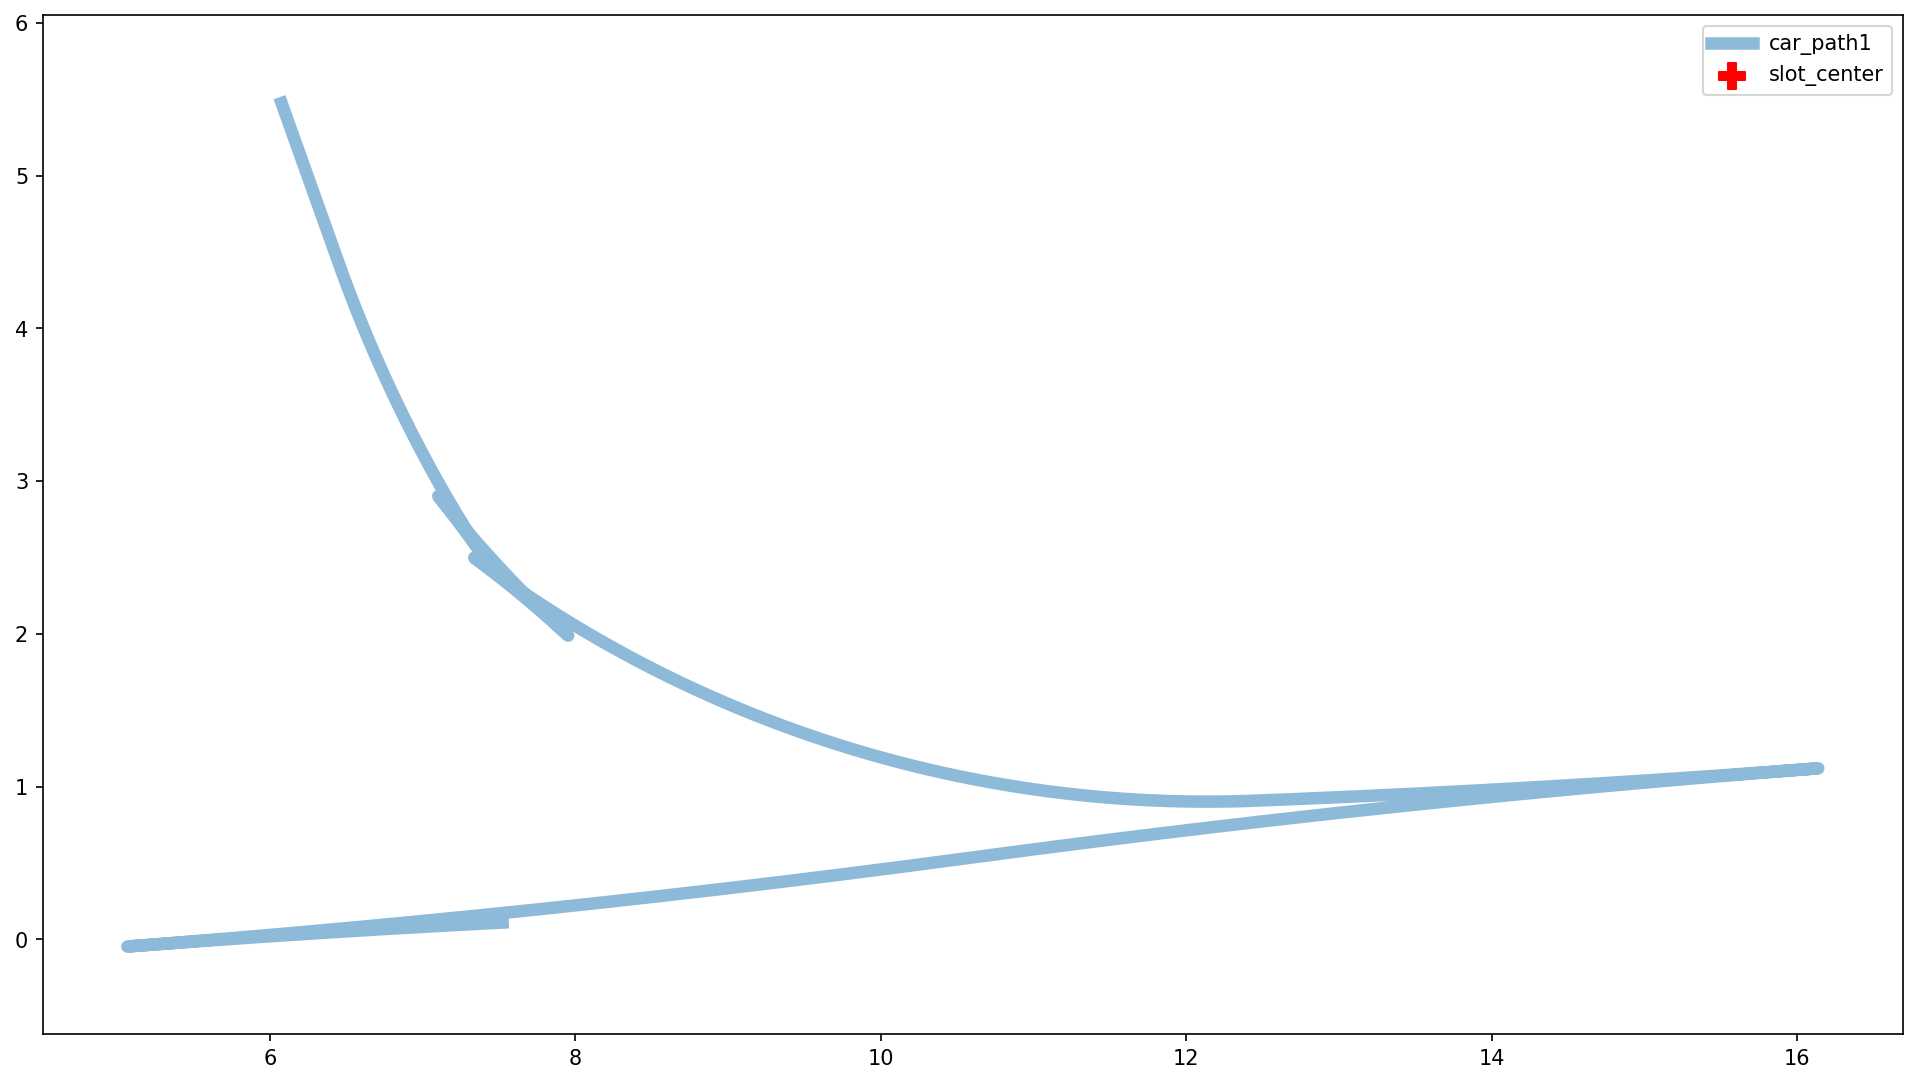

In [15]:
# plot true goal, corrected goal, planned path

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")

# 1. plot computed path
plt.plot(path_carx, path_cary, label="car_path1", linewidth=6, alpha=0.5)

# 9: plot shared state goal
# plt.scatter(shared_state_goal_x, shared_state_goal_y, label="shared_state_goal", marker='+', color='r', s=300)
# print("shared goal [x, y, theta]:\t", shared_state_goal_x, shared_state_goal_y, shared_state_goal_theta)

# 7. plot true goal
# plt.scatter(true_goal_x, true_goal_y, label="true_goal", marker='D', color='g', s=200, alpha=0.6)
# print("true goal [x, y, theta]:\t", true_goal_x, true_goal_y, true_goal_theta)

# 8. plot correct goal
# plt.scatter(correct_goal_x, correct_goal_y, label="correct_goal", marker='*', color='m', s=300, alpha=0.6)
# print("correct goal [x, y, theta]:\t", correct_goal_x, correct_goal_y, correct_goal_theta)

# 9. plot odom goal
# plt.scatter(odom_goal_x, odom_goal_y, label="odom_goal", marker='*', color='k', s=150)
# print("odom goal [x, y, theta]:\t", odom_goal_x, odom_goal_y, odom_goal_theta)

# 2. plot start
# plt.scatter(pose_start_x, pose_start_y, label="pose_start", marker='*', color='k', s=150)
# print("pose start [x, y, theta]:\t", pose_start_x, pose_start_y, pose_start_theta)

# 3. plot goal
# plt.scatter(pose_goal_x, pose_goal_y, label="pose_goal", marker='+', color='r', s=150)
# print("pose goal [x, y, theta]:\t", pose_goal_x, pose_goal_y, pose_goal_theta)
# print("goal to start: dx :\t", pose_goal_x[0] - pose_start_x[0])
# print("goal to start: dy :\t", pose_goal_y[0] - pose_start_y[0])

# 4. plot forward mid
# plt.scatter(forward_mid_x, forward_mid_y, label="forward_mid", marker='^', color='g', s=150)

# 5. plot reverse mid
# plt.scatter(reverse_mid_x, reverse_mid_y, label="reverse_mid", marker='v', color='m', s=150)


# 6. plot slot center
plt.scatter(slot_center_x, slot_center_y, label="slot_center", marker='P', color='r', s=150)
# print("slot center x, y, theta:\t", slot_center_x, slot_center_y, slot_center_theta)


###############################################################################################
#################### calculate parking slot points using slot_center or slot_center_apa

import numpy as np
from math import sqrt, cos, sin, radians, atan2, degrees

def cc2wc_transform(point_list_cc_x, point_list_cc_y, point_list_wc_x, point_list_wc_y, tr_theta, tr_x, tr_y):
    """ affine transformation matrix
    transform points in cc frame to wc frame using rotation & translation matrix T_R
    """
    point_list_cc = []
    point_list_wc = []
    
    for i in range(len(point_list_cc_x)):
        x = point_list_cc_x[i]
        y = point_list_cc_y[i]
        z = 1
#         print("x cc:\t", x)
#         print("y cc:\t", y)
        tmp_path_point = np.array([
            [x],
            [y],
            [1],
        ])
        point_list_cc.append(tmp_path_point)
    
    T_R = np.array([
        [cos(tr_theta), -sin(tr_theta), tr_x],
        [sin(tr_theta), cos(tr_theta), tr_y],
        [0, 0, 1],
    ])
    
    for i in range(len(point_list_cc_x)):
        tmp_point_wc = T_R.dot(point_list_cc[i])
        point_list_wc.append(tmp_point_wc)
        tmp_x_wc = tmp_point_wc[0][0]
        tmp_y_wc = tmp_point_wc[1][0]
        point_list_wc_x.append(tmp_x_wc)
        point_list_wc_y.append(tmp_y_wc)
    

slot_point_x_cc = [3,     3,    -3,   -3]
slot_point_y_cc = [-1.25, 1.25, 1.25, -1.25]
slot_point_x_wc = []
slot_point_y_wc = []
tr_theta = -0.032905
tr_x = 6.28528
tr_y = 3.28661
# cc2wc_transform(slot_point_x_cc, slot_point_y_cc, 
#                 slot_point_x_wc, slot_point_y_wc,
#                tr_theta, tr_x, tr_y)
# print("slot points x:\t", slot_point_x_wc)
# print("slot points y:\t", slot_point_y_wc)


# 7. plot parking slot
plt.plot(slot_point_x_wc, slot_point_y_wc)


    
###############################################################################################
#################### some auxiliary graph


# 8. plot circle
# circle_1 = plt.Circle((slot_point_x_wc[0], slot_point_y_wc[0]), 1.1, fill=False)
# plt.gca().add_patch(circle_1)

# 9. draw line from goal to start
# plt.plot((pose_start_x[0], pose_goal_x[0]), (pose_start_y[0], pose_goal_y[0]))


# 10_temp. draw a test point
temp_x = [8.7]
temp_y = [1.0]
temp_theta = [-0.436332313]
# plt.scatter(temp_x, temp_y, label="temp middle point", color='r', s=50)
# print("temp middle point x, y, theta:\t", temp_x, temp_y, temp_theta)


print("m_iterations:\t", m_iterations)
print("m_lane_width:\t", m_lane_width)

plt.legend(loc="best")

plt.show()



# 2. compare multi compute_path

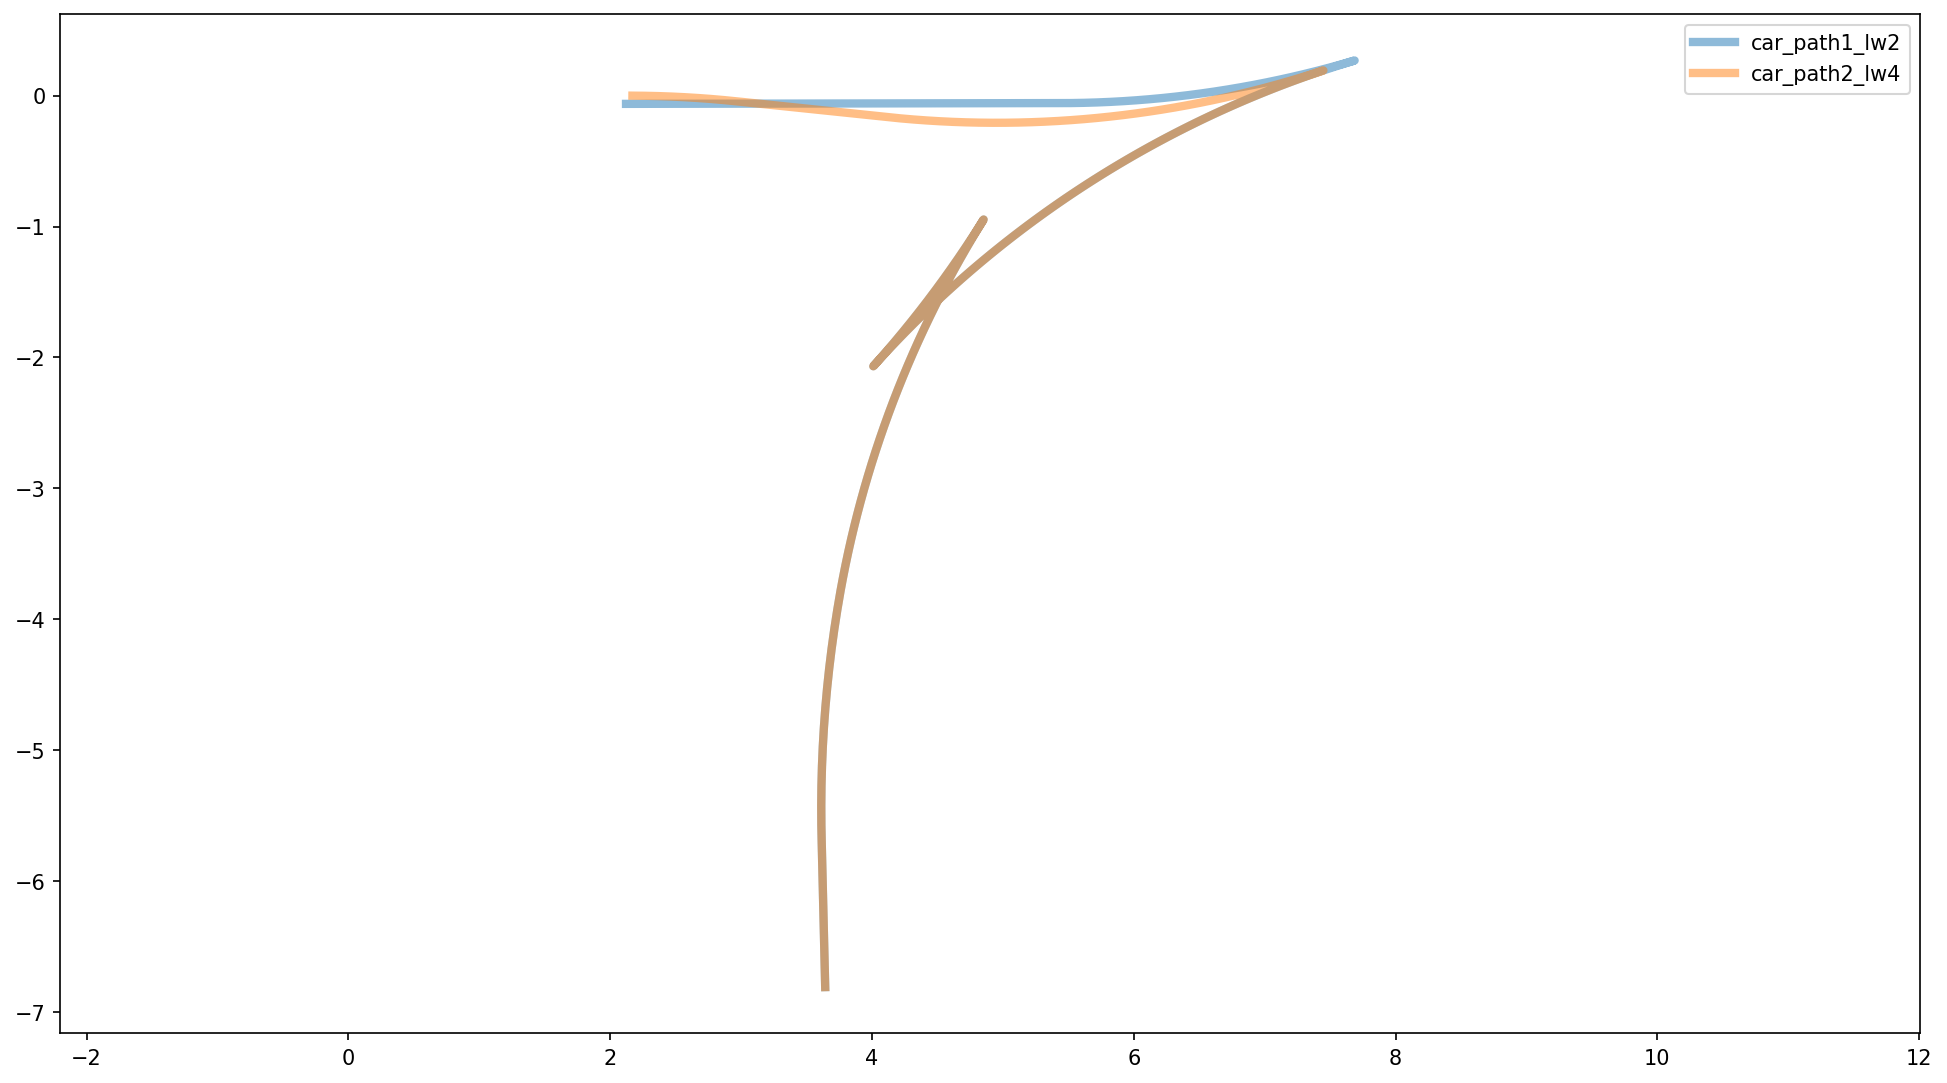

In [40]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


# assign abs. path value 

# car_path_1 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\pc_pm5_parallel/"
# log_car_file_1 = car_path_1+"pc_log.txt"
# path_car_file_1 = car_path_1+"computed_path.txt"

car_path_1 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220406\tense_optimization_3\lw_5_debug\it_5/"
log_car_file_1 = car_path_1+"pc_log.txt"
path_car_file_1 = car_path_1+"computed_path.txt"

car_path_2 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220330\9_tense_optimization\lw_5\it_4/"
log_car_file_2 = car_path_2+"pc_log.txt"
path_car_file_2 = car_path_2+"computed_path.txt"


# parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx_1 = []
    path_cary_1 = []

    with (open(path_car_file_1,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_1.append(float(line.split()[0]))
                path_cary_1.append(float(line.split()[1]))
except:
    print("path_car 1 error")  
    

# parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx_2 = []
    path_cary_2 = []

    with (open(path_car_file_2,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_2.append(float(line.split()[0]))
                path_cary_2.append(float(line.split()[1]))
except:
    print("path_car 2 error")  
    
    
# plot true goal, corrected goal, planned path

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")


# 1. plot computed path 1
plt.plot(path_carx_1, path_cary_1, label="car_path1_lw2", linewidth=4, alpha=0.5)

# 2. plot computed path 2
plt.plot(path_carx_2, path_cary_2, label="car_path2_lw4", linewidth=4, alpha=0.5)


####################################################################################################
#################### plot import point


# 2. plot start
# plt.scatter(pose_start_x, pose_start_y, label="pose_start", marker='*', color='k', s=150)
# print("pose start [x, y, theta]:\t", pose_start_x, pose_start_y, pose_start_theta)

# 3. plot goal
# plt.scatter(pose_goal_x, pose_goal_y, label="pose_goal", marker='+', color='r', s=150)
# print("pose goal [x, y, theta]:\t", pose_goal_x, pose_goal_y, pose_goal_theta)
# print("goal to start: dx :\t", pose_goal_x[0] - pose_start_x[0])
# print("goal to start: dy :\t", pose_goal_y[0] - pose_start_y[0])

# 6. plot slot center
# plt.scatter(slot_center_x, slot_center_y, label="slot_center", marker='P', color='r', s=150)
# print("slot center x, y, theta:\t", slot_center_x, slot_center_y, slot_center_theta)


# 7. plot parking slot
# plt.plot(slot_point_x_wc, slot_point_y_wc)


# 8. plot circle
# circle_1 = plt.Circle((slot_point_x_wc[0], slot_point_y_wc[0]), 1.1, fill=False)
# plt.gca().add_patch(circle_1)



plt.legend(loc="best")

plt.show()

# 3. draw multiple path

In [61]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


# assign abs. path value 

# car_path_1 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\pc_pm5_parallel/"
# log_car_file_1 = car_path_1+"pc_log.txt"
# path_car_file_1 = car_path_1+"computed_path.txt"

# root = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220406\tense_optimization_3\lw_4_debug\it_5/"
root = r"D:\Z_DesayWorkSpace\7948_onsite_testing\7948_20220407\0407_onsite\0407_pc_4/"
# log_car_file_1 = car_path_1+"pc_log.txt"
# path_car_file_1 = car_path_1+"computed_path.txt"
car_path = root + "computed_path.txt"


# root = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220406\tense_optimization_3\lw_4_debug\it_5/"
root_2 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220407\lw5_it5/"
# log_car_file_1 = car_path_1+"pc_log.txt"
# path_car_file_1 = car_path_1+"computed_path.txt"
car_path_2 = root_2 + "computed_path.txt"

path_car_file_mid_1 = root+"middle_path_1.txt"

path_car_file_mid_2 = root+"middle_path_2.txt"

path_car_file_mid_3_1 = root+"middle_path_3_1.txt"

path_car_file_mid_4_1 = root+"middle_path_4_1.txt"

path_car_file_mid_5 = root+"middle_path_5.txt"

print(car_path)

D:\Z_DesayWorkSpace\7948_onsite_testing\7948_20220407\0407_onsite\0407_pc_4/computed_path.txt


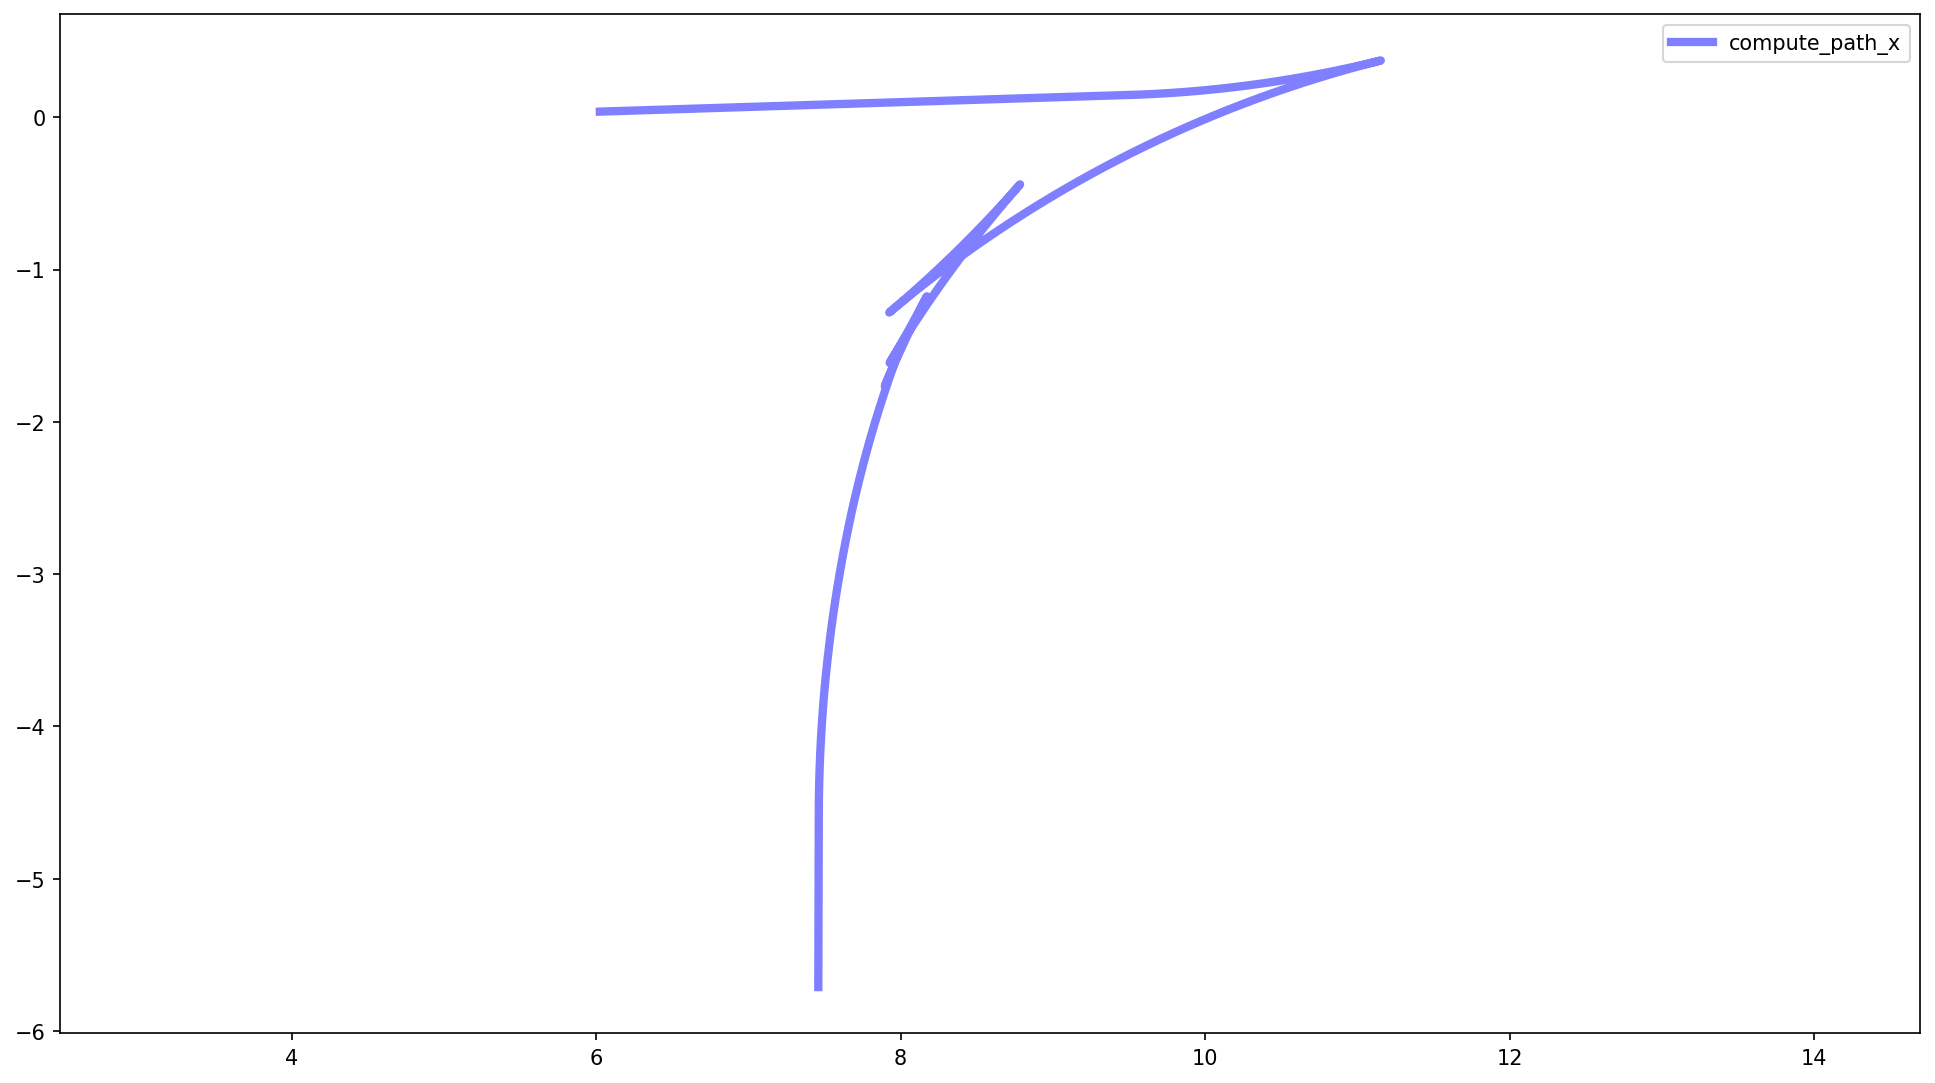

In [62]:
compute_path_x = []
compute_path_y = []

compute_path_2_x = []
compute_path_2_y = []

# path_carx_1 = []
# path_cary_1 = []

# path_carx_2 = []
# path_cary_2 = []

# path_carx_3_1 = []
# path_cary_3_1 = []

# path_carx_4_1 = []
# path_cary_4_1 = []

# path_carx_5 = []
# path_cary_5 = []


try:
    with (open(car_path,"r")) as f:
        for line in f:
            if ("x y" not in line):
                compute_path_x.append(float(line.split()[0]))
                compute_path_y.append(float(line.split()[1]))
                
    with (open(car_path_2,"r")) as f:
        for line in f:
            if ("x y" not in line):
                compute_path_2_x.append(float(line.split()[0]))
                compute_path_2_y.append(float(line.split()[1]))

    with (open(path_car_file_mid_1,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_1.append(float(line.split()[0]))
                path_cary_1.append(float(line.split()[1]))

    with (open(path_car_file_mid_2,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_2.append(float(line.split()[0]))
                path_cary_2.append(float(line.split()[1]))
                
    with (open(path_car_file_mid_3_1,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_3_1.append(float(line.split()[0]))
                path_cary_3_1.append(float(line.split()[1]))
                
    with (open(path_car_file_mid_4_1,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_4_1.append(float(line.split()[0]))
                path_cary_4_1.append(float(line.split()[1]))
                
    with (open(path_car_file_mid_5,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_5.append(float(line.split()[0]))
                path_cary_5.append(float(line.split()[1]))

except:
    print("Unexpected error:", sys.exc_info()[0])
    raise
    

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")


# 1. plot computed path

# plt.plot(path_carx_1, path_cary_1, label="path_cary_1", linewidth=4, alpha=1, color="g")
# plt.plot(path_carx_2, path_cary_2, label="path_cary_2", linewidth=4, alpha=1, color="r")
# plt.plot(path_carx_3_1, path_cary_3_1, label="path_cary_3_1", linewidth=4, alpha=0.4, color="b")
# plt.plot(path_carx_4_1, path_cary_4_1, label="path_cary_4_1", linewidth=4, alpha=0.3, color="b")
# plt.plot(path_carx_5, path_cary_5, label="path_cary_5", linewidth=4, alpha=0.2, color="b")
# plt.plot(compute_path_x, compute_path_y, label="compute_path_x", linewidth=4, alpha=0.1, color="b")

plt.plot(compute_path_x, compute_path_y, label="compute_path_x", linewidth=4, alpha=0.5, color="b")
# plt.plot(compute_path_2_x, compute_path_2_y, label="compute_path_2_x", linewidth=4, alpha=0.1, color="r")
# plt.plot(path_carx_5, path_cary_5, label="path_cary_5", linewidth=4, alpha=0.2, color="b")
# plt.plot(path_carx_4_1, path_cary_4_1, label="path_cary_4_1", linewidth=4, alpha=0.3, color="b")
# plt.plot(path_carx_3_1, path_cary_3_1, label="path_cary_3_1", linewidth=4, alpha=0.4, color="b")
# plt.plot(path_carx_2, path_cary_2, label="path_cary_2", linewidth=4, alpha=1, color="r")
# plt.plot(path_carx_1, path_cary_1, label="path_cary_1", linewidth=4, alpha=1, color="g")


plt.legend(loc="best")

plt.show()

# 4. plot simple path using compute_path_simple_rs

In [ ]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


# assign abs. path value 

car_path = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220406\tense_optimization\lw_1\it_1/"

# for ros_parkingMiddleGoalsDemo
log_car_file = car_path+"pc_log.log"
# log_car_file = car_path+"ros_log.txt"
path_car_file = car_path+"computed_path.txt"

print(log_car_file)
print(path_car_file)

In [ ]:
# load computed path files
try:
    path_carx_1 = []
    path_cary_1 = []

    with (open(path_car_file_1,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_1.append(float(line.split()[0]))
                path_cary_1.append(float(line.split()[1]))
except:
    print("path_car 1 error")  

# 5. plot parallel parking with standard slot, center at origin 

path_car_file_2:	 D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\pc_cp_rpRS_start-goal/computed_path.txt
path_car_file_1:	 D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\ros_rs_start_goal_052/computed_path.txt


NameError: name 'pose_start_x' is not defined

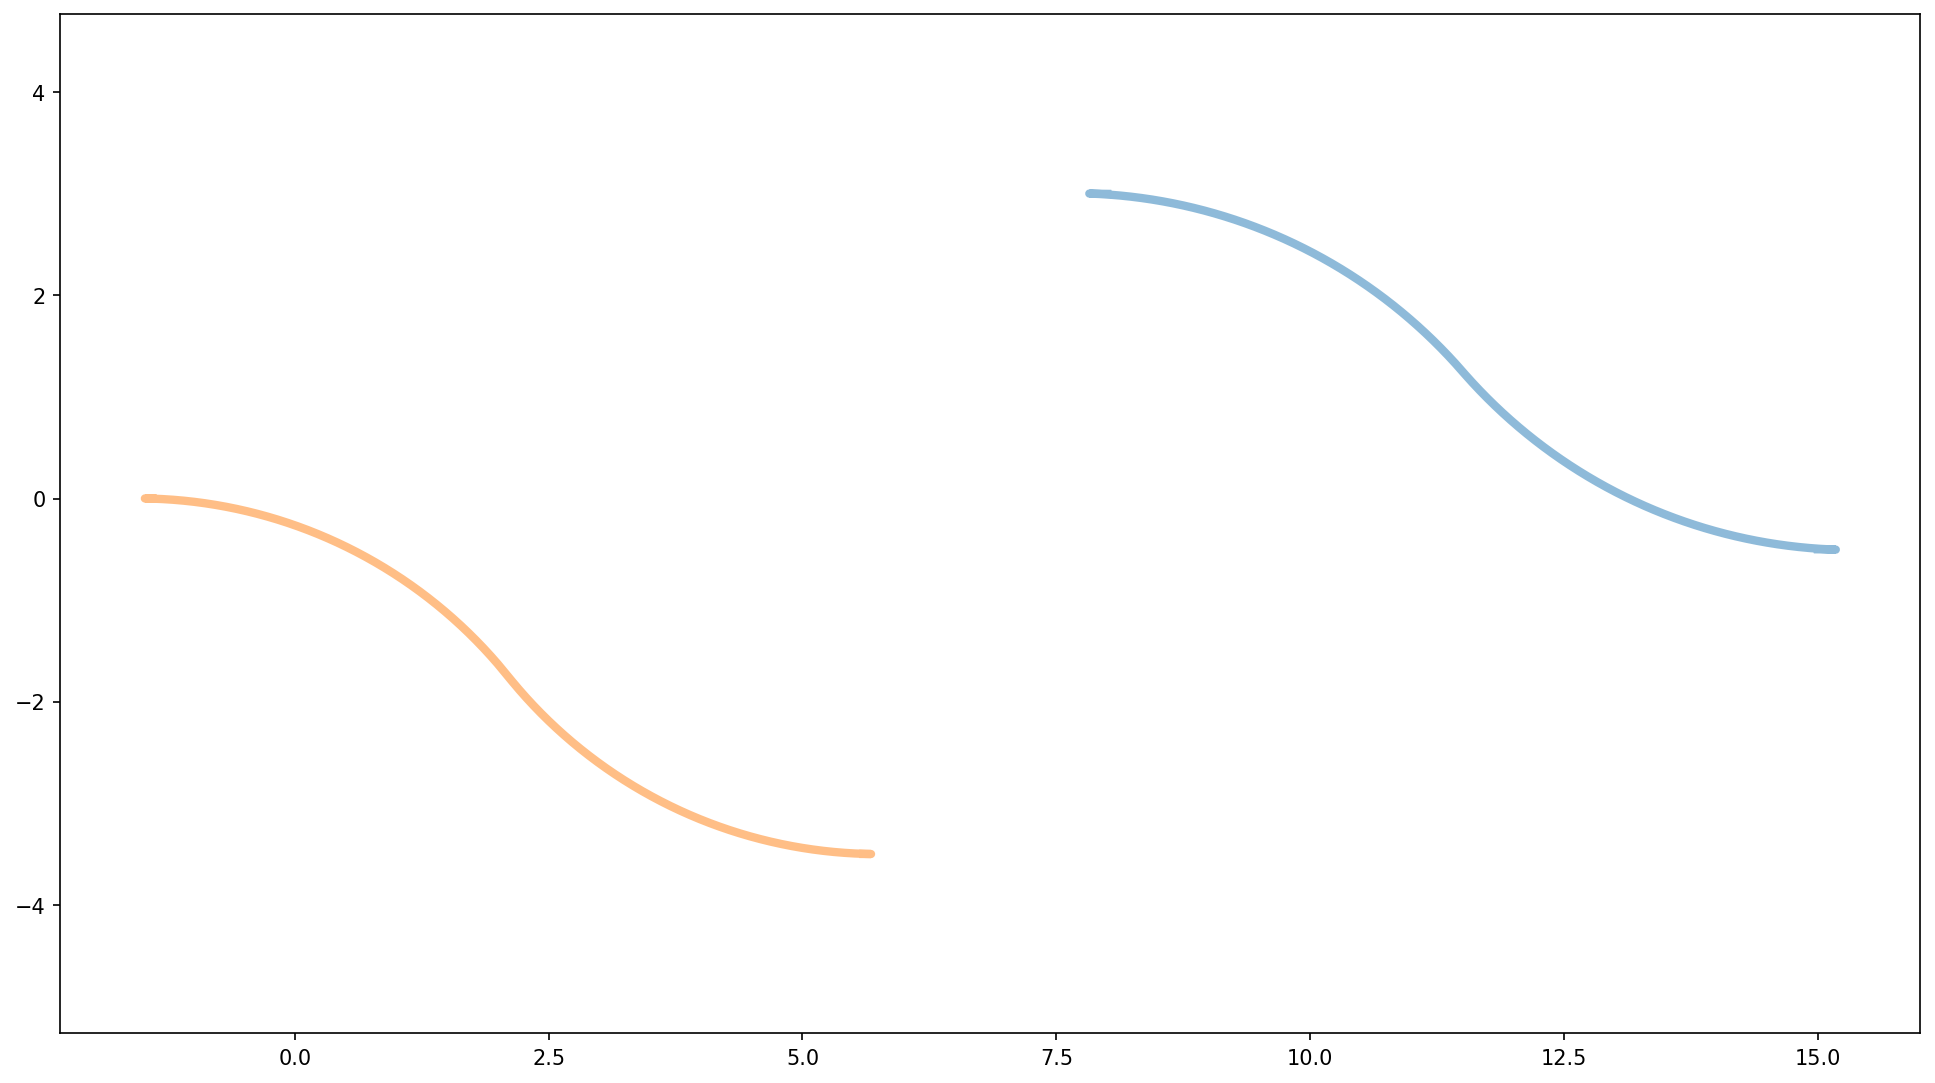

In [2]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


# assign abs. path value 


# ideal model
car_path_2 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\pc_cp_rpRS_start-goal/"
log_car_file_2 = car_path_2+"pc_log.txt"
path_car_file_2 = car_path_2+"computed_path.txt"
print("path_car_file_2:\t", path_car_file_2)

# ros sim
car_path_1 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\ros_rs_start_goal_052/"
log_car_file_1 = car_path_1+"pc_log.txt"
path_car_file_1 = car_path_1+"computed_path.txt"
print("path_car_file_1:\t", path_car_file_1)


# car_path_2 = r"D:\Z_DesayWorkSpace\5023_path_jinbiao\5023_20220402\4_pc\pc_cp_pm5_path_Start/"
# log_car_file_2 = car_path_2+"pc_log.txt"
# path_car_file_2 = car_path_2+"computed_path.txt"





# parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx_1 = []
    path_cary_1 = []

    with (open(path_car_file_1,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_1.append(float(line.split()[0]))
                path_cary_1.append(float(line.split()[1]))
except:
    print("path_car 1 error")  
    

# # parse path file: parkingMiddleGoalsDemo_reg.txt

# load computed path files
try:
    path_carx_2 = []
    path_cary_2 = []

    with (open(path_car_file_2,"r")) as f:
        for line in f:
            if ("x y" not in line):
                path_carx_2.append(float(line.split()[0]))
                path_cary_2.append(float(line.split()[1]))
except:
    print("path_car 2 error")  
    
    
# plot true goal, corrected goal, planned path

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")


# 1. plot computed path
plt.plot(path_carx_1, path_cary_1, label="car_path1_lw2", linewidth=4, alpha=0.5)

# 1. plot computed path ideal
plt.plot(path_carx_2, path_cary_2, label="ideal", linewidth=4, alpha=0.5)

# # 2. plot computed path
# plt.plot(path_carx_2, path_cary_2, label="car_path2_lw4", linewidth=4, alpha=0.5)


####################################################################################################
######################### plot import point


# 2. plot start
plt.scatter(pose_start_x, pose_start_y, label="pose_start", marker='*', color='k', s=150)
# print("pose start [x, y, theta]:\t", pose_start_x, pose_start_y, pose_start_theta)

# 3. plot goal
plt.scatter(pose_goal_x, pose_goal_y, label="pose_goal", marker='+', color='r', s=150)
# print("pose goal [x, y, theta]:\t", pose_goal_x, pose_goal_y, pose_goal_theta)
# print("goal to start: dx :\t", pose_goal_x[0] - pose_start_x[0])
# print("goal to start: dy :\t", pose_goal_y[0] - pose_start_y[0])

# 6. plot slot center
# plt.scatter(slot_center_x, slot_center_y, label="slot_center", marker='P', color='r', s=150)
# print("slot center x, y, theta:\t", slot_center_x, slot_center_y, slot_center_theta)


##############################################################################################################
######################### plot env. objects

# 7. plot parking slot
slot_point_1_x = [3, 3, -3, -3]
slot_point_1_y = [-1.25, 1.25, 1.25, -1.25]
slot_point_2_x = [9, 9, 3, 3]
slot_point_2_y = [-1.25, 1.25, 1.25, -1.25]
plt.plot(slot_point_1_x, slot_point_1_y, color="k")
plt.plot(slot_point_2_x, slot_point_2_y, color="k")


# 8. plot circle
circle_1 = plt.Circle((slot_point_1_x[0], slot_point_2_y[0]), 1.1, fill=False)
plt.gca().add_patch(circle_1)


# 9. plot stopper
stopper_1_x = [-2, -2]
stopper_1_y = [-1.25, 1.25]
stopper_2_x = [4, 4]
stopper_2_y = [-1.25, 1.25]
plt.plot(stopper_1_x, stopper_1_y, linestyle="dotted", color="k")
plt.plot(stopper_2_x, stopper_2_y, linestyle="dotted", color="k")


# 10. plot cross_goal
cross_goal_1_x = [-1.4]
cross_goal_1_y = [0]
cross_goal_2_x = [4.6]
cross_goal_2_y = [0]
plt.scatter(cross_goal_1_x, cross_goal_1_y, label="cross_goal", marker='x', color='r', s=150)
plt.scatter(cross_goal_2_x, cross_goal_2_y, label="cross_goal", marker='x', color='r', s=150)


# 11. plot lane 4 meters 
lane_1_x = [-3, 9]
lane_1_y = [-1.25, -1.25]
lane_2_x = [-3, 9]
lane_2_y = [-5.25, -5.25]
plt.plot(lane_1_x, lane_1_y, linestyle="dashed", color="k")
plt.plot(lane_2_x, lane_2_y, linestyle="dashed", color="k")


# 12. ideal path start pose
path_start_ideal_x = [4.6]
path_start_ideal_y = [-3.5]
plt.scatter(path_start_ideal_x, path_start_ideal_y, label="path_start_ideal", marker='x', color='r', s=150)


# 13. plot auxiliary start line 
aux_start_lane_x = [-3, 9]
aux_start_lane_y = [-3.5, -3.5]
plt.plot(aux_start_lane_x, aux_start_lane_y, linestyle="dashed", color="k")


##############################################################################################################
######################### define affine matrix
    
import numpy as np
from math import sqrt, cos, sin, radians, atan2, degrees

def cc2wc_transform(point_list_cc_x, point_list_cc_y, point_list_wc_x, point_list_wc_y, tr_theta, tr_x, tr_y):
    """ affine transformation matrix
    transform points in cc frame to wc frame using rotation & translation matrix T_R
    """
    point_list_cc = []
    point_list_wc = []
    
    for i in range(len(point_list_cc_x)):
        x = point_list_cc_x[i]
        y = point_list_cc_y[i]
        z = 1
#         print("x cc:\t", x)
#         print("y cc:\t", y)
        tmp_path_point = np.array([
            [x],
            [y],
            [1],
        ])
        point_list_cc.append(tmp_path_point)
    
    T_R = np.array([
        [cos(tr_theta), -sin(tr_theta), tr_x],
        [sin(tr_theta), cos(tr_theta), tr_y],
        [0, 0, 1],
    ])
    
    for i in range(len(point_list_cc_x)):
        tmp_point_wc = T_R.dot(point_list_cc[i])
        point_list_wc.append(tmp_point_wc)
        tmp_x_wc = tmp_point_wc[0][0]
        tmp_y_wc = tmp_point_wc[1][0]
        point_list_wc_x.append(tmp_x_wc)
        point_list_wc_y.append(tmp_y_wc)    


        
        
##############################################################################################################
######################### plot car object
        
    
# 9. plot car box at init pose
car_body_box_init_x = [4.26, 4.26, -0.94, -0.94, 4.26, 0] # last is rear-wheel-center
car_body_box_init_y = [-1.1, 1.1, 1.1, -1.1, -1.1, 0] # last is rear-wheel-center
# plt.plot(car_body_box_init_x[0:5], car_body_box_init_y[0:5], linewidth=4)
# plt.scatter(car_body_box_init_x[-1], car_body_box_init_y[-1], color='g', s=100)


# 将 所有 computed_path(x, y) 写入 path_list_cc
car_body_box_init_cc = []
for i in range(len(car_body_box_init_x)):
    x = car_body_box_init_x[i]
    y = car_body_box_init_y[i]
    z = 1
    tmp_path_point = np.array([
        [x],
        [y],
        [1],
    ])
    car_body_box_init_cc.append(tmp_path_point)

    
        
car_body_box_wc_obstacle_x = []
car_body_box_wc_obstacle_y = []
tr_theta = 0.0
tr_x = 4.6
tr_y = 0.0
cc2wc_transform(car_body_box_init_x, car_body_box_init_y, 
                car_body_box_wc_obstacle_x, car_body_box_wc_obstacle_y,
                tr_theta, tr_x, tr_y)

print("car_body_box_wc_obstacle_x:\t", car_body_box_wc_obstacle_x)        
print("car_body_box_wc_obstacle_y:\t", car_body_box_wc_obstacle_y)        
plt.plot(car_body_box_wc_obstacle_x[0:5], car_body_box_wc_obstacle_y[0:5], linewidth=4, color='g')
plt.scatter(car_body_box_wc_obstacle_x[-1], car_body_box_wc_obstacle_y[-1], color='g', s=100)
        
  

##############################################################################################################
######################### path translation

path_car_wc_x = []
path_car_wc_y = []
tr_theta = 0.0
tr_x = -9.4
tr_y = -3.0
cc2wc_transform(path_carx_1, path_cary_1, 
                path_car_wc_x, path_car_wc_y,
                tr_theta, tr_x, tr_y)

# 1. plot computed path
plt.plot(path_car_wc_x, path_car_wc_y, label="path_car_wc", linewidth=4, alpha=0.5)
    

plt.legend(loc="best")

plt.show()